In [1]:
import random

# **Pure $\lambda$-Calculus**

[The deatailed script](https://www.mathcha.io/editor/Pvvz5UZ1t7ktL6sZJYp19sZnX9vVserJMEKhJvvMx7)

## **Variables**

The code below models variables.

Using the `natgen()` generator in this code ensures that a fresh variable is returned in response to each constructor call.

## Import dependencies

In [2]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, algorithms, base, creator
from tqdm import tqdm
import seaborn as sns

sys.path.append("../")
from calculus.term import Var, Atom, Application, Abstraction
from calculus.strategy import (
    LeftmostOutermostStrategy,
    LeftmostInnermostStrategy,
    RightmostInnermostStrategy,
    RightmostOutermostStrategy,
    RandomStrategy,
    MixedStrategy,
)
from calculus.generation import genTerm

In [3]:
UPLIMIT = 60
DOWNLIMIT = 50

LAMBDA_TERM_COUNT = 100

RANDOM_AVERAGE_COUNT = 20


def filterTerms(term):
    return term and DOWNLIMIT < term.verticesNumber < UPLIMIT


def flatten(t):
    return [item for sublist in t for item in sublist]


terms = flatten(
    [
        list(filter(filterTerms, [genTerm(p, UPLIMIT) for i in range(7000)]))
        for p in np.arange(0.49, 0.51, 0.02)
    ]
)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

stepsLO = list(map(lambda term: term.normalize(LeftmostOutermostStrategy())[1], terms))
print("number of steps to normalize using LO strategy= {}".format(stepsLO))

terms_with_normal_form = []
stepsLO_temp = []
for i, term in enumerate(terms):
    if stepsLO[i] != float("inf"):
        terms_with_normal_form.append(term)
        stepsLO_temp.append(stepsLO[i])
terms = terms_with_normal_form[:LAMBDA_TERM_COUNT]
stepsLO = stepsLO_temp[:LAMBDA_TERM_COUNT]

print(f"number of terms with normal form {len(terms)}")
assert len(terms) == LAMBDA_TERM_COUNT

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [
    sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)])
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

number of lambda terms 248
number of vertices= [51, 52, 55, 59, 59, 58, 54, 51, 59, 57, 57, 53, 57, 54, 57, 57, 54, 56, 51, 53, 57, 55, 57, 58, 58, 55, 54, 52, 52, 52, 52, 55, 52, 53, 53, 53, 54, 56, 58, 59, 58, 57, 53, 53, 54, 51, 55, 56, 59, 51, 55, 55, 57, 53, 53, 51, 51, 58, 51, 51, 59, 51, 52, 53, 55, 58, 51, 54, 56, 51, 52, 53, 54, 53, 56, 59, 52, 57, 58, 53, 55, 58, 54, 57, 55, 53, 53, 56, 58, 54, 57, 51, 59, 54, 56, 53, 56, 55, 53, 55, 59, 52, 57, 53, 57, 59, 53, 53, 53, 55, 58, 58, 54, 55, 57, 58, 51, 57, 51, 53, 56, 52, 53, 59, 54, 51, 57, 53, 55, 57, 58, 58, 58, 54, 58, 59, 59, 54, 59, 58, 57, 55, 55, 54, 52, 51, 56, 55, 52, 51, 54, 53, 52, 57, 59, 58, 56, 52, 52, 52, 57, 53, 51, 52, 57, 59, 59, 59, 58, 51, 58, 52, 56, 52, 52, 52, 55, 51, 57, 51, 51, 55, 57, 58, 59, 56, 55, 51, 57, 51, 53, 52, 51, 55, 55, 53, 59, 54, 55, 52, 57, 53, 53, 56, 52, 59, 56, 57, 54, 56, 58, 59, 57, 52, 56, 58, 56, 57, 57, 52, 52, 51, 52, 52, 58, 59, 54, 58, 58, 59, 51, 51, 57, 52, 51, 56, 51, 53, 

In [4]:
def draw_hist(data):
    steps = [x for x in data if x != float("inf")]

    distributions = get_common_distributions()
    distributions.remove("expon")
    distributions.remove("cauchy")
    f = Fitter(steps, distributions=distributions)
    f.fit()
    summary = f.summary()
    distribution = f.get_best(method="sumsquare_error")

    print("==============")
    print(f"number of not normalized terms: {len(data) - len(steps)}")
    print(summary)
    print(distribution)
    print(f'Norm distribution: {f.fitted_param["norm"]}')
    print("==============")
    plt.xlabel("Number of reduction steps")
    plt.show()

    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()
    mu, sigma = f_ln.fitted_param["norm"]
    print(
        f"Log Norm distribution params: ({mu}, {sigma}); expected value = {np.e ** (mu + (sigma ** 2) / 2)}"
    )

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.43it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
gamma            0.319641   932.190686 -560.757263     inf      0.074062   
lognorm          0.321826   932.295154 -560.076058     inf      0.080193   
rayleigh         0.339185  1097.227469 -559.427664     inf      0.160072   
exponpow         0.349955   913.388981 -551.696464     inf      0.175393   
norm             0.351327  1169.669990 -555.910373     inf      0.131219   

          ks_pvalue  
gamma      0.616099  
lognorm    0.515141  
rayleigh   0.010494  
exponpow   0.003675  
norm       0.058194  
{'gamma': {'a': 1.2919881688977646, 'loc': 0.8870297329538743, 'scale': 5.722186689315754}}
Norm distribution: (8.28, 6.243524645582814)


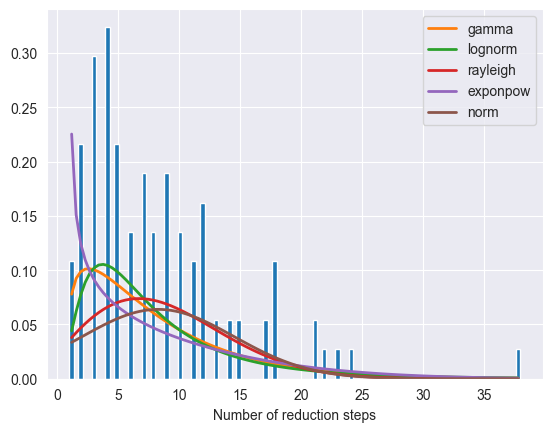

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.46it/s]


Log Norm distribution params: (1.8369609187777587, 0.7776489206506839); expected value = 8.493743559659217


Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.59it/s]


number of not normalized terms: 4
          sumsquare_error         aic         bic  kl_div  ks_statistic  \
chi2             0.585310  864.855363 -475.903262     inf      0.095810   
gamma            0.585310  864.857462 -475.903261     inf      0.095810   
lognorm          0.586140  862.122615 -475.767228     inf      0.104532   
rayleigh         0.598467  937.531626 -478.333651     inf      0.153017   
norm             0.612643  998.922158 -476.086188     inf      0.166103   

          ks_pvalue  
chi2       0.320826  
gamma      0.320829  
lognorm    0.228477  
rayleigh   0.019878  
norm       0.008772  
{'chi2': {'df': 4.734114219042604, 'loc': 1.6111104464215913, 'scale': 1.7390087855946725}}
Norm distribution: (9.84375, 5.412809123197184)


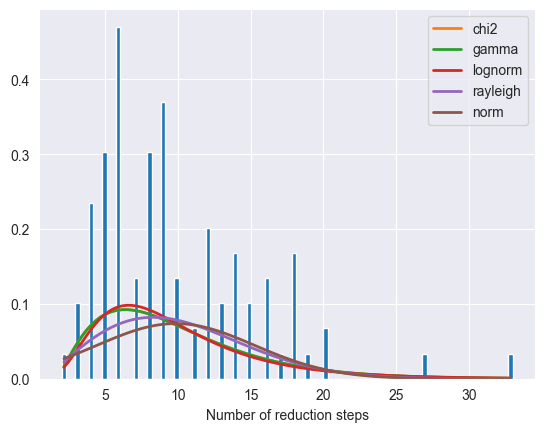

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.31it/s]


Log Norm distribution params: (2.1454607738942832, 0.5368050064578539); expected value = 9.870401992835482


Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.53it/s]


number of not normalized terms: 3
          sumsquare_error         aic         bic  kl_div  ks_statistic  \
chi2             0.091909  842.512895 -661.557949     inf      0.057110   
gamma            0.091909  842.514542 -661.557913     inf      0.057109   
lognorm          0.094781  847.498785 -658.572516     inf      0.076619   
exponpow         0.101620  850.490324 -651.814915     inf      0.064845   
rayleigh         0.117613  906.506683 -642.212168     inf      0.154180   

          ks_pvalue  
chi2       0.891686  
gamma      0.891692  
lognorm    0.592240  
exponpow   0.784815  
rayleigh   0.017670  
{'chi2': {'df': 2.830337376385666, 'loc': 1.933921825539332, 'scale': 2.7934159366068396}}
Norm distribution: (9.840206185567009, 6.345160665815585)


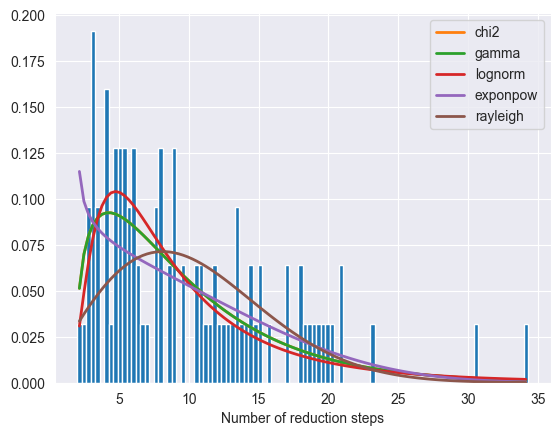

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.57it/s]

Log Norm distribution params: (2.0842052146319774, 0.645876675299828); expected value = 9.902463400093152


In [5]:
draw_hist(stepsLO)
draw_hist(stepsRI)
draw_hist(stepsRand)

In [ ]:
results = []
values = list(range(0, 101, 5))
for p_lo in tqdm(values):
    p = (p_lo / 100, 1 - p_lo / 100)
    steps = [
        sum(
            [
                term.normalize(
                    MixedStrategy(
                        [LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p
                    )
                )[1]
                for i in range(RANDOM_AVERAGE_COUNT)
            ]
        )
        / RANDOM_AVERAGE_COUNT
        for term in terms
    ]
    steps = list(filter(lambda x: x != float("inf"), steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma**2) / 2)
    results.append(result)

plt.plot(values, results)
plt.xlabel("p_LO")
plt.ylabel("Expected number of steps")
plt.show()

  0%|          | 0/21 [00:00<?, ?it/s]

In [7]:
def eaSimpleWithElitism(
    population,
    toolbox,
    cxpb,
    mutpb,
    ngen,
    stats=None,
    halloffame=None,
    verbose=__debug__,
):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.51it/s]


expected number of steps to normalize using Mixed strategy= 9.400293582087006


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.86it/s]


expected number of steps to normalize using Mixed strategy= 9.717019864067876


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.43it/s]


expected number of steps to normalize using Mixed strategy= 10.419493072078701


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.02it/s]


expected number of steps to normalize using Mixed strategy= 8.623203282186973


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.89it/s]


expected number of steps to normalize using Mixed strategy= 8.863156647531186


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.60it/s]


expected number of steps to normalize using Mixed strategy= 9.576098292017855


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.03it/s]


expected number of steps to normalize using Mixed strategy= 8.890203929744208


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.18it/s]


expected number of steps to normalize using Mixed strategy= 8.776009500574563


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.56it/s]


expected number of steps to normalize using Mixed strategy= 9.87405172478194


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.57it/s]


expected number of steps to normalize using Mixed strategy= 8.764651783881817


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.86it/s]


expected number of steps to normalize using Mixed strategy= 9.01400078981214


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.18it/s]


expected number of steps to normalize using Mixed strategy= 9.074923548832393


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.75it/s]


expected number of steps to normalize using Mixed strategy= 9.400931305692266


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.48it/s]


expected number of steps to normalize using Mixed strategy= 9.375513013990913


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


expected number of steps to normalize using Mixed strategy= 9.222940727110101


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.69it/s]


expected number of steps to normalize using Mixed strategy= 8.868480473191415


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.31it/s]


expected number of steps to normalize using Mixed strategy= 10.322452022485484


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.31it/s]


expected number of steps to normalize using Mixed strategy= 8.94603256646104


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 24.99it/s]


expected number of steps to normalize using Mixed strategy= 9.322512370300606


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.09it/s]


expected number of steps to normalize using Mixed strategy= 10.199477665284197
gen	nevals	min   	avg    
0  	20    	8.6232	9.33257


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.18it/s]


expected number of steps to normalize using Mixed strategy= 8.875630063280182


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.48it/s]


expected number of steps to normalize using Mixed strategy= 8.891810829345928


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.31it/s]


expected number of steps to normalize using Mixed strategy= 9.336088406286319


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.69it/s]


expected number of steps to normalize using Mixed strategy= 8.867657873243669


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.62it/s]


expected number of steps to normalize using Mixed strategy= 8.862114928934648


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.38it/s]


expected number of steps to normalize using Mixed strategy= 9.789339407359515


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.35it/s]


expected number of steps to normalize using Mixed strategy= 8.859141600976137


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.78it/s]


expected number of steps to normalize using Mixed strategy= 8.661420782809152


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.38it/s]


expected number of steps to normalize using Mixed strategy= 8.625454129163433


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.75it/s]


expected number of steps to normalize using Mixed strategy= 8.844409282136967


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


expected number of steps to normalize using Mixed strategy= 8.692717184461115


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.69it/s]


expected number of steps to normalize using Mixed strategy= 8.916668357014188


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.66it/s]


expected number of steps to normalize using Mixed strategy= 9.045720268760808


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.09it/s]


expected number of steps to normalize using Mixed strategy= 9.591627813028756


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.66it/s]


expected number of steps to normalize using Mixed strategy= 8.624105475109968
1  	15    	8.6232	13.0564


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.03it/s]


expected number of steps to normalize using Mixed strategy= 8.591240394504714


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.35it/s]


expected number of steps to normalize using Mixed strategy= 8.770030300214493


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.38it/s]


expected number of steps to normalize using Mixed strategy= 9.610453554596127


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.94it/s]


expected number of steps to normalize using Mixed strategy= 9.002445647075282


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.30it/s]


expected number of steps to normalize using Mixed strategy= 9.703325258525554


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.43it/s]


expected number of steps to normalize using Mixed strategy= 8.639960407413248


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.18it/s]


expected number of steps to normalize using Mixed strategy= 8.606027266542622


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.62it/s]


expected number of steps to normalize using Mixed strategy= 8.634215766994046


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.79it/s]


expected number of steps to normalize using Mixed strategy= 8.897982048563128


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.67it/s]


expected number of steps to normalize using Mixed strategy= 8.853591548932647


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.75it/s]


expected number of steps to normalize using Mixed strategy= 9.274026773194878


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.70it/s]


expected number of steps to normalize using Mixed strategy= 8.751187026720535


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.78it/s]


expected number of steps to normalize using Mixed strategy= 8.666831295930283


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.13it/s]


expected number of steps to normalize using Mixed strategy= 8.595412755190942


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.60it/s]


expected number of steps to normalize using Mixed strategy= 8.614666614191217


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 33.13it/s]


expected number of steps to normalize using Mixed strategy= 9.817572025821491
2  	16    	8.59124	9.53352


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.60it/s]


expected number of steps to normalize using Mixed strategy= 8.992693230196991


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.40it/s]


expected number of steps to normalize using Mixed strategy= 8.59289841210996


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.77it/s]


expected number of steps to normalize using Mixed strategy= 8.7596783308783


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.38it/s]


expected number of steps to normalize using Mixed strategy= 8.659225328036221


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.02it/s]


expected number of steps to normalize using Mixed strategy= 8.618194002187265


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.43it/s]


expected number of steps to normalize using Mixed strategy= 8.714360627713075


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.52it/s]


expected number of steps to normalize using Mixed strategy= 8.572579285070931


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.87it/s]


expected number of steps to normalize using Mixed strategy= 8.645022469300807


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.94it/s]


expected number of steps to normalize using Mixed strategy= 8.59781739785062


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.79it/s]


expected number of steps to normalize using Mixed strategy= 9.059653523945249


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.68it/s]


expected number of steps to normalize using Mixed strategy= 8.808710168740959


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.18it/s]


expected number of steps to normalize using Mixed strategy= 8.658150007049734


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.12it/s]


expected number of steps to normalize using Mixed strategy= 9.690221812751782


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.96it/s]


expected number of steps to normalize using Mixed strategy= 8.60916175745235


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.27it/s]


expected number of steps to normalize using Mixed strategy= 8.63961914974339
3  	15    	8.59124	10.156 


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.41it/s]


expected number of steps to normalize using Mixed strategy= 8.657698378942529


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.31it/s]


expected number of steps to normalize using Mixed strategy= 8.638674617124945


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.39it/s]


expected number of steps to normalize using Mixed strategy= 8.64903879288514


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.07it/s]


expected number of steps to normalize using Mixed strategy= 8.638849437219491


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.21it/s]


expected number of steps to normalize using Mixed strategy= 8.641493309645774


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 25.86it/s]


expected number of steps to normalize using Mixed strategy= 8.975611183014236


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.77it/s]


expected number of steps to normalize using Mixed strategy= 8.641150574060601


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.27it/s]


expected number of steps to normalize using Mixed strategy= 8.595856748458438


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.12it/s]


expected number of steps to normalize using Mixed strategy= 8.703134908005701


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.23it/s]


expected number of steps to normalize using Mixed strategy= 8.634924683478111


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.47it/s]


expected number of steps to normalize using Mixed strategy= 8.634733269786365


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.65it/s]


expected number of steps to normalize using Mixed strategy= 8.629737222942945


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.66it/s]


expected number of steps to normalize using Mixed strategy= 8.603268010124737


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.61it/s]


expected number of steps to normalize using Mixed strategy= 8.650249702858963


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.41it/s]


expected number of steps to normalize using Mixed strategy= 8.638067841469502


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 30.00it/s]


expected number of steps to normalize using Mixed strategy= 8.80460108381121
4  	16    	8.59124	9.56589


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.33it/s]


expected number of steps to normalize using Mixed strategy= 8.698916096485224


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.93it/s]


expected number of steps to normalize using Mixed strategy= 8.613451816460309


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.27it/s]


expected number of steps to normalize using Mixed strategy= 8.621391978530255


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.16it/s]


expected number of steps to normalize using Mixed strategy= 8.617414563665678


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.89it/s]


expected number of steps to normalize using Mixed strategy= 8.64752547291547


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.93it/s]


expected number of steps to normalize using Mixed strategy= 8.58092841463143


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.30it/s]


expected number of steps to normalize using Mixed strategy= 8.623796655071454


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.03it/s]


expected number of steps to normalize using Mixed strategy= 8.62070831692843


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.51it/s]


expected number of steps to normalize using Mixed strategy= 8.655094786827883


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.70it/s]


expected number of steps to normalize using Mixed strategy= 8.642778929783978


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 17.82it/s]


expected number of steps to normalize using Mixed strategy= 8.89124753322262


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.83it/s]


expected number of steps to normalize using Mixed strategy= 8.63808632926365


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.45it/s]


expected number of steps to normalize using Mixed strategy= 8.647336916699153


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.86it/s]


expected number of steps to normalize using Mixed strategy= 8.60606849588094
5  	14    	8.58093	10.1036


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.27it/s]


expected number of steps to normalize using Mixed strategy= 8.603115420763993


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.41it/s]


expected number of steps to normalize using Mixed strategy= 8.643532841086845


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.54it/s]


expected number of steps to normalize using Mixed strategy= 8.636468096044982


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.14it/s]


expected number of steps to normalize using Mixed strategy= 8.60696730673406


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.18it/s]


expected number of steps to normalize using Mixed strategy= 8.629682808547694


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.21it/s]


expected number of steps to normalize using Mixed strategy= 8.509324429221111


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.32it/s]


expected number of steps to normalize using Mixed strategy= 8.604088794758518


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.30it/s]


expected number of steps to normalize using Mixed strategy= 8.587710640020106


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.26it/s]


expected number of steps to normalize using Mixed strategy= 8.511296464077809


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.92it/s]


expected number of steps to normalize using Mixed strategy= 8.501453686521934


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.95it/s]


expected number of steps to normalize using Mixed strategy= 8.607766765998628


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.91it/s]


expected number of steps to normalize using Mixed strategy= 8.605040587742034


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.90it/s]


expected number of steps to normalize using Mixed strategy= 8.615810613858256


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.66it/s]


expected number of steps to normalize using Mixed strategy= 8.666652397287814


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.94it/s]


expected number of steps to normalize using Mixed strategy= 8.653971844550458


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.48it/s]


expected number of steps to normalize using Mixed strategy= 8.576174816550305
6  	16    	8.57617	10.2752


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.63it/s]


expected number of steps to normalize using Mixed strategy= 8.640450562281975


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.57it/s]


expected number of steps to normalize using Mixed strategy= 8.63653344309039


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.31it/s]


expected number of steps to normalize using Mixed strategy= 8.6155642145799


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.83it/s]


expected number of steps to normalize using Mixed strategy= 8.60459605797814


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.60it/s]


expected number of steps to normalize using Mixed strategy= 8.66086322163056


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.60it/s]


expected number of steps to normalize using Mixed strategy= 8.694221532912778


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.27it/s]


expected number of steps to normalize using Mixed strategy= 8.616541011850114


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.84it/s]


expected number of steps to normalize using Mixed strategy= 8.590569727909239


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.35it/s]


expected number of steps to normalize using Mixed strategy= 8.634982754075237


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.39it/s]


expected number of steps to normalize using Mixed strategy= 8.563212901068374


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 27.02it/s]


expected number of steps to normalize using Mixed strategy= 8.732553903565664


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.49it/s]


expected number of steps to normalize using Mixed strategy= 8.627535959632555


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.33it/s]


expected number of steps to normalize using Mixed strategy= 8.603928347048923


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 28.10it/s]


expected number of steps to normalize using Mixed strategy= 8.61497531061015


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 26.94it/s]


expected number of steps to normalize using Mixed strategy= 8.647981856315157


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 29.20it/s]

expected number of steps to normalize using Mixed strategy= 8.622263530926835
7  	16    	8.56321	10.7027
- Best solution is: 
p =  [0.9296803400076312, 0.004499103145437172, 0.018080212809589647, 0.0003341253822642569]


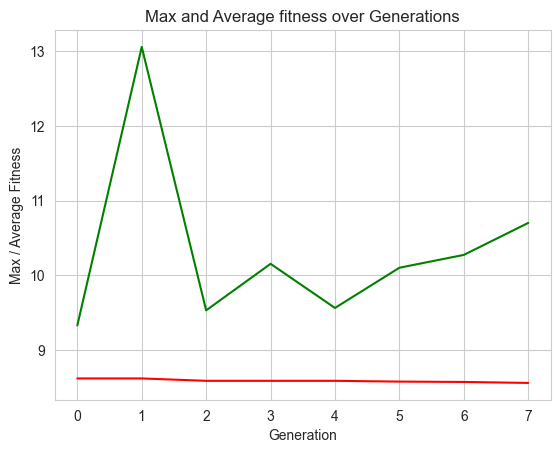

In [8]:
STRATEGIES = [
    LeftmostOutermostStrategy(),
    RightmostInnermostStrategy(),
    LeftmostInnermostStrategy(),
    RightmostOutermostStrategy(),
    RandomStrategy(),
]

BOUNDS_LOW = [0.1, 0.0, 0.0, 0.0]
BOUNDS_HIGH = [
    1.0,
    1.0,
    1.0,
    1.0,
]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.3  # probability for mutating an individual
MAX_GENERATIONS = 7
HALL_OF_FAME_SIZE = 4
CROWDING_FACTOR = 10  # crowding factor for crossover and mutation

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# define the hyperparameter attributes individually:
for i in range(NUM_OF_PARAMS):
    # "hyperparameter_0", "hyperparameter_1", ...
    toolbox.register(
        "hyperparameter_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i]
    )

# create a tuple containing an attribute generator for each param searched:
hyperparameters = ()
for i in range(NUM_OF_PARAMS):
    hyperparameters = hyperparameters + (
        toolbox.__getattribute__("hyperparameter_" + str(i)),
    )


# create the individual operator to fill up an Individual instance:
def individual_creator() -> creator.Individual:
    indv = [0 for _ in range(NUM_OF_PARAMS)]
    for i in range(NUM_OF_PARAMS):
        indv[i] = random.uniform(BOUNDS_LOW[i], 1 - sum(indv))
    return creator.Individual(indv)


# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, individual_creator)


# fitness calculation
def fitness(individual):
    p = individual.copy()
    p.append(max(0, 1 - sum(individual)))
    steps = [
        sum(
            [
                term.normalize(MixedStrategy(STRATEGIES, p))[1]
                for i in range(RANDOM_AVERAGE_COUNT)
            ]
        )
        / RANDOM_AVERAGE_COUNT
        for term in terms
    ]
    steps = list(filter(lambda x: x != float("inf"), steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma**2) / 2)
    print(
        "expected number of steps to normalize using Mixed strategy= {}".format(result)
    )
    if 1 - sum(individual) < 0:
        result += 100 * (sum(individual) - 1)
    return (result,)


toolbox.register("evaluate", fitness)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register(
    "mate",
    tools.cxSimulatedBinaryBounded,
    low=BOUNDS_LOW,
    up=BOUNDS_HIGH,
    eta=CROWDING_FACTOR,
)
toolbox.register(
    "mutate",
    tools.mutPolynomialBounded,
    low=BOUNDS_LOW,
    up=BOUNDS_HIGH,
    eta=CROWDING_FACTOR,
    indpb=1.0 / NUM_OF_PARAMS,
)

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = eaSimpleWithElitism(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATIONS,
    stats=stats,
    halloffame=hof,
    verbose=True,
)

# print best solution found:
print("- Best solution is: ")
print("p = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color="red")
plt.plot(meanFitnessValues, color="green")
plt.xlabel("Generation")
plt.ylabel("Max / Average Fitness")
plt.title("Max and Average fitness over Generations")
plt.show()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 32.51it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
gamma            0.174468   931.791532 -621.302812     inf      0.062658   
chi2             0.174468   931.793577 -621.302761     inf      0.062661   
lognorm          0.176368   930.711914 -620.220024     inf      0.076397   
exponpow         0.184143   959.309938 -615.905594     inf      0.110370   
rayleigh         0.192986  1093.406815 -615.820605     inf      0.145479   

          ks_pvalue  
gamma      0.803836  
chi2       0.803786  
lognorm    0.577045  
exponpow   0.162249  
rayleigh   0.026048  
{'gamma': {'a': 1.3494036513604064, 'loc': 0.8775619543260356, 'scale': 5.570921804108853}}
Norm distribution: (8.395, 6.224759031480656)


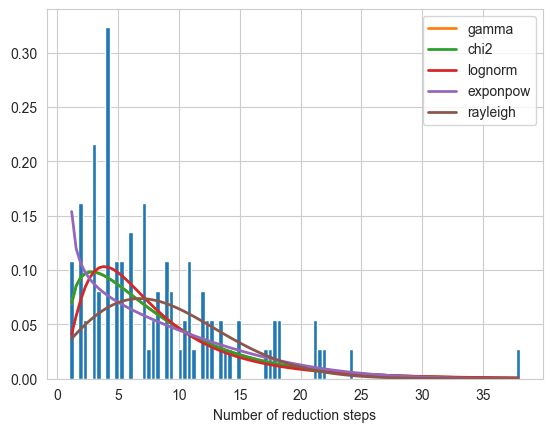

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.31it/s]

Log Norm distribution params: (1.8570737535996609, 0.7699939654855789); expected value = 8.615122653161126


In [9]:
p = hof.items[0]
p.append(max(0, 1 - sum(p)))
MixedStrategySteps = [
    sum(
        [
            term.normalize(MixedStrategy(STRATEGIES, p))[1]
            for i in range(RANDOM_AVERAGE_COUNT)
        ]
    )
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
draw_hist(MixedStrategySteps)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 34.62it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
chi2             0.264941   933.473502 -579.526333     inf      0.070654   
gamma            0.264941   933.475369 -579.526329     inf      0.070656   
lognorm          0.266947   932.865430 -578.771897     inf      0.071326   
exponpow         0.276412  1034.682327 -575.287689     inf      0.130454   
rayleigh         0.284020  1099.001626 -577.177766     inf      0.150980   

          ks_pvalue  
chi2       0.673640  
gamma      0.673605  
lognorm    0.662293  
exponpow   0.060614  
rayleigh   0.018681  
{'chi2': {'df': 2.629018567340524, 'loc': 0.8758980557558148, 'scale': 2.8252513675231317}}
Norm distribution: (8.3035, 6.228443846579979)


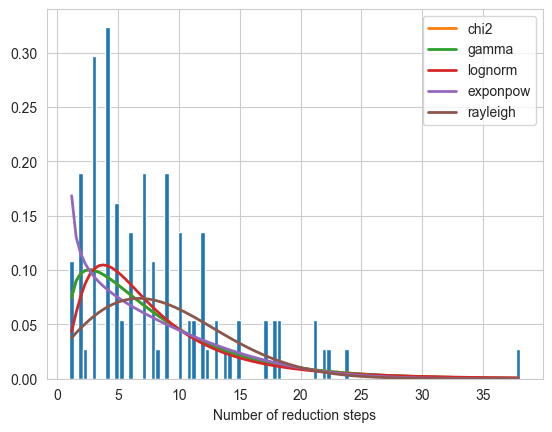

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.31it/s]

Log Norm distribution params: (1.8417332582659902, 0.7755145622611609); expected value = 8.520241422428457


In [10]:
p = [0.98, 0.005, 0.005, 0.005, 0.005]
steps = [
    sum(
        [
            term.normalize(MixedStrategy(STRATEGIES, p))[1]
            for i in range(RANDOM_AVERAGE_COUNT)
        ]
    )
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
draw_hist(steps)

In [11]:
def draw_2d_distribution(ax, x, y, xlabel, ylabel):
    ax.scatter(x, y, color="blue")
    ax.set(
        title="Distribution of " + xlabel.lower() + "-" + ylabel.lower(),
        xlabel=xlabel,
        ylabel=ylabel,
    )
    ax.legend(prop={"size": 10})


def draw_2d_strategy_distribution(ax, x, y, xlabel, ylabel):
    x = list(map(lambda v: -1 if v == float("inf") else v, x))
    y = list(map(lambda v: -1 if v == float("inf") else v, y))
    greater = list(
        zip(
            *list(
                filter(lambda z: z[0] >= z[1] and z[0] != -1 and z[1] != -1, zip(x, y))
            )
        )
    )
    less = list(
        zip(
            *list(
                filter(lambda z: z[0] < z[1] and z[0] != -1 and z[1] != -1, zip(x, y))
            )
        )
    )
    inf_x = list(zip(*list(filter(lambda z: z[0] == -1 and z[1] != -1, zip(x, y)))))
    inf_y = list(zip(*list(filter(lambda z: z[0] != -1 and z[1] == -1, zip(x, y)))))
    inf_xy = list(zip(*list(filter(lambda z: z[0] == -1 and z[1] == -1, zip(x, y)))))
    ax.scatter(
        greater[0], greater[1], color="blue", label="{} <= {}".format(ylabel, xlabel)
    )
    ax.scatter(less[0], less[1], color="red", label="{} < {}".format(xlabel, ylabel))
    if inf_x:
        ax.scatter(
            inf_x[0],
            inf_x[1],
            color="lime",
            label="{} doesn't normalize".format(xlabel),
        )
    if inf_y:
        ax.scatter(
            inf_y[0],
            inf_y[1],
            color="yellow",
            label="{} dooesn't normalize".format(ylabel),
        )
    if inf_xy:
        ax.scatter(
            inf_xy[0],
            inf_xy[1],
            color="orange",
            label="Both strategies don't normalize",
        )
    ax.set(
        title="Distribution of " + xlabel.lower() + "-" + ylabel.lower(),
        xlabel=xlabel,
        ylabel=ylabel,
    )
    ax.legend(prop={"size": 10})

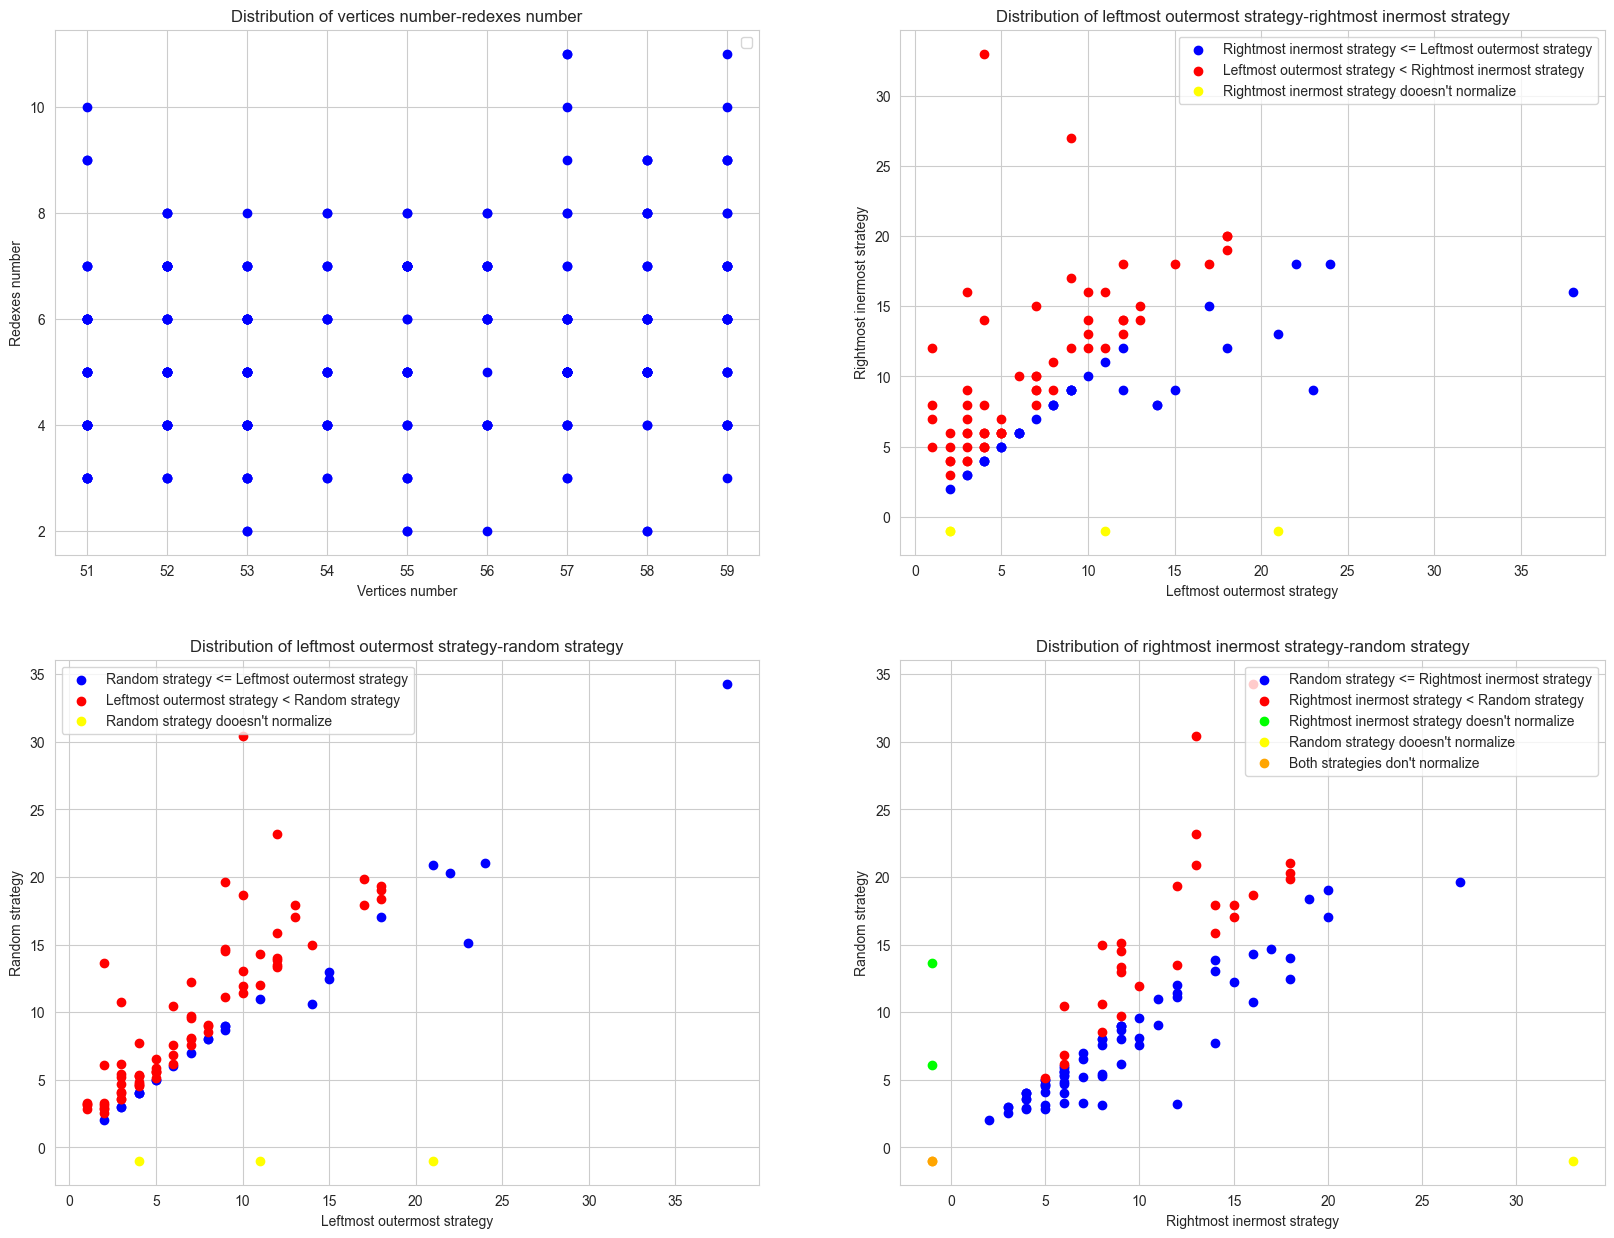

In [12]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax0, ax1, ax2, ax3 = axes.flatten()
draw_2d_distribution(
    ax0, countVertices, countRedexes, "Vertices number", "Redexes number"
)
draw_2d_strategy_distribution(
    ax1, stepsLO, stepsRI, "Leftmost outermost strategy", "Rightmost inermost strategy"
)
draw_2d_strategy_distribution(
    ax2, stepsLO, stepsRand, "Leftmost outermost strategy", "Random strategy"
)
draw_2d_strategy_distribution(
    ax3, stepsRI, stepsRand, "Rightmost inermost strategy", "Random strategy"
)
plt.show()

In [13]:
def draw_plot(x, y, z, q, labels, colors):
    x = list(map(lambda v: -1 if v == float("inf") else v, x))
    y = list(map(lambda v: -1 if v == float("inf") else v, y))
    z = list(map(lambda v: -1 if v == float("inf") else v, z))
    q = list(map(lambda v: -1 if v == float("inf") else v, q))

    data = pd.DataFrame(zip(x, y, z, q), columns=labels)
    ax0 = data.plot(figsize=(20, 10), kind="bar", color=colors)
    ax0.set(
        title="Distribution of number of reduction steps for each term",
        xlabel="Term index",
        ylabel="Number of reduction steps",
    )
    ax0.legend(prop={"size": 10})
    plt.show()
    return ax0

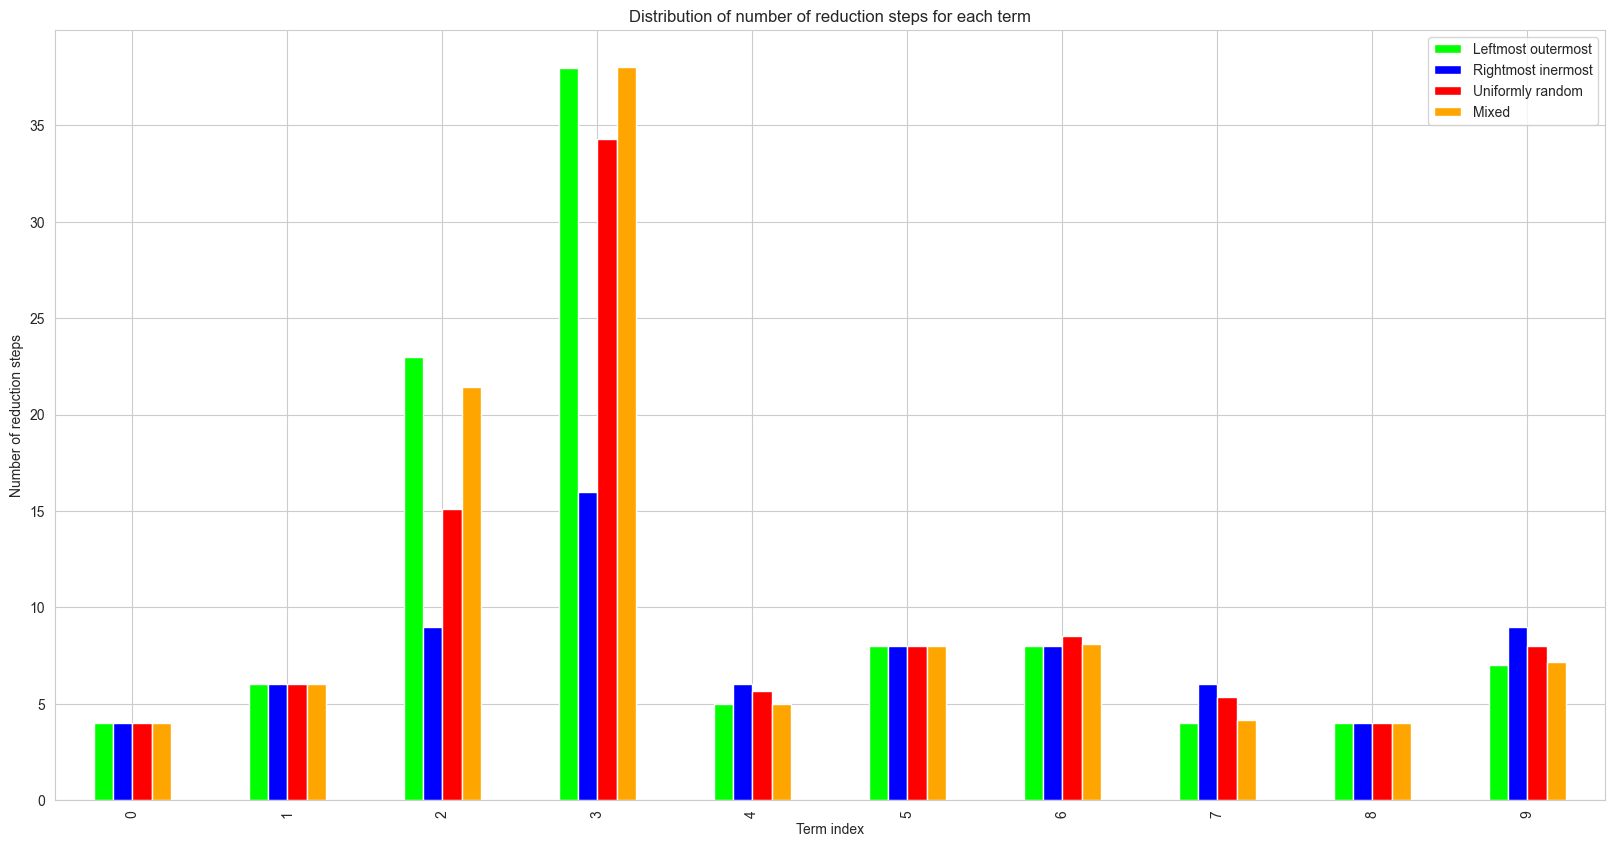

<AxesSubplot: title={'center': 'Distribution of number of reduction steps for each term'}, xlabel='Term index', ylabel='Number of reduction steps'>

In [14]:
colors = ["lime", "blue", "red", "orange"]
labels = ["Leftmost outermost", "Rightmost inermost", "Uniformly random", "Mixed"]
n = 20
draw_plot(
    stepsLO[10:n],
    stepsRI[10:n],
    stepsRand[10:n],
    MixedStrategySteps[10:n],
    labels,
    colors,
)

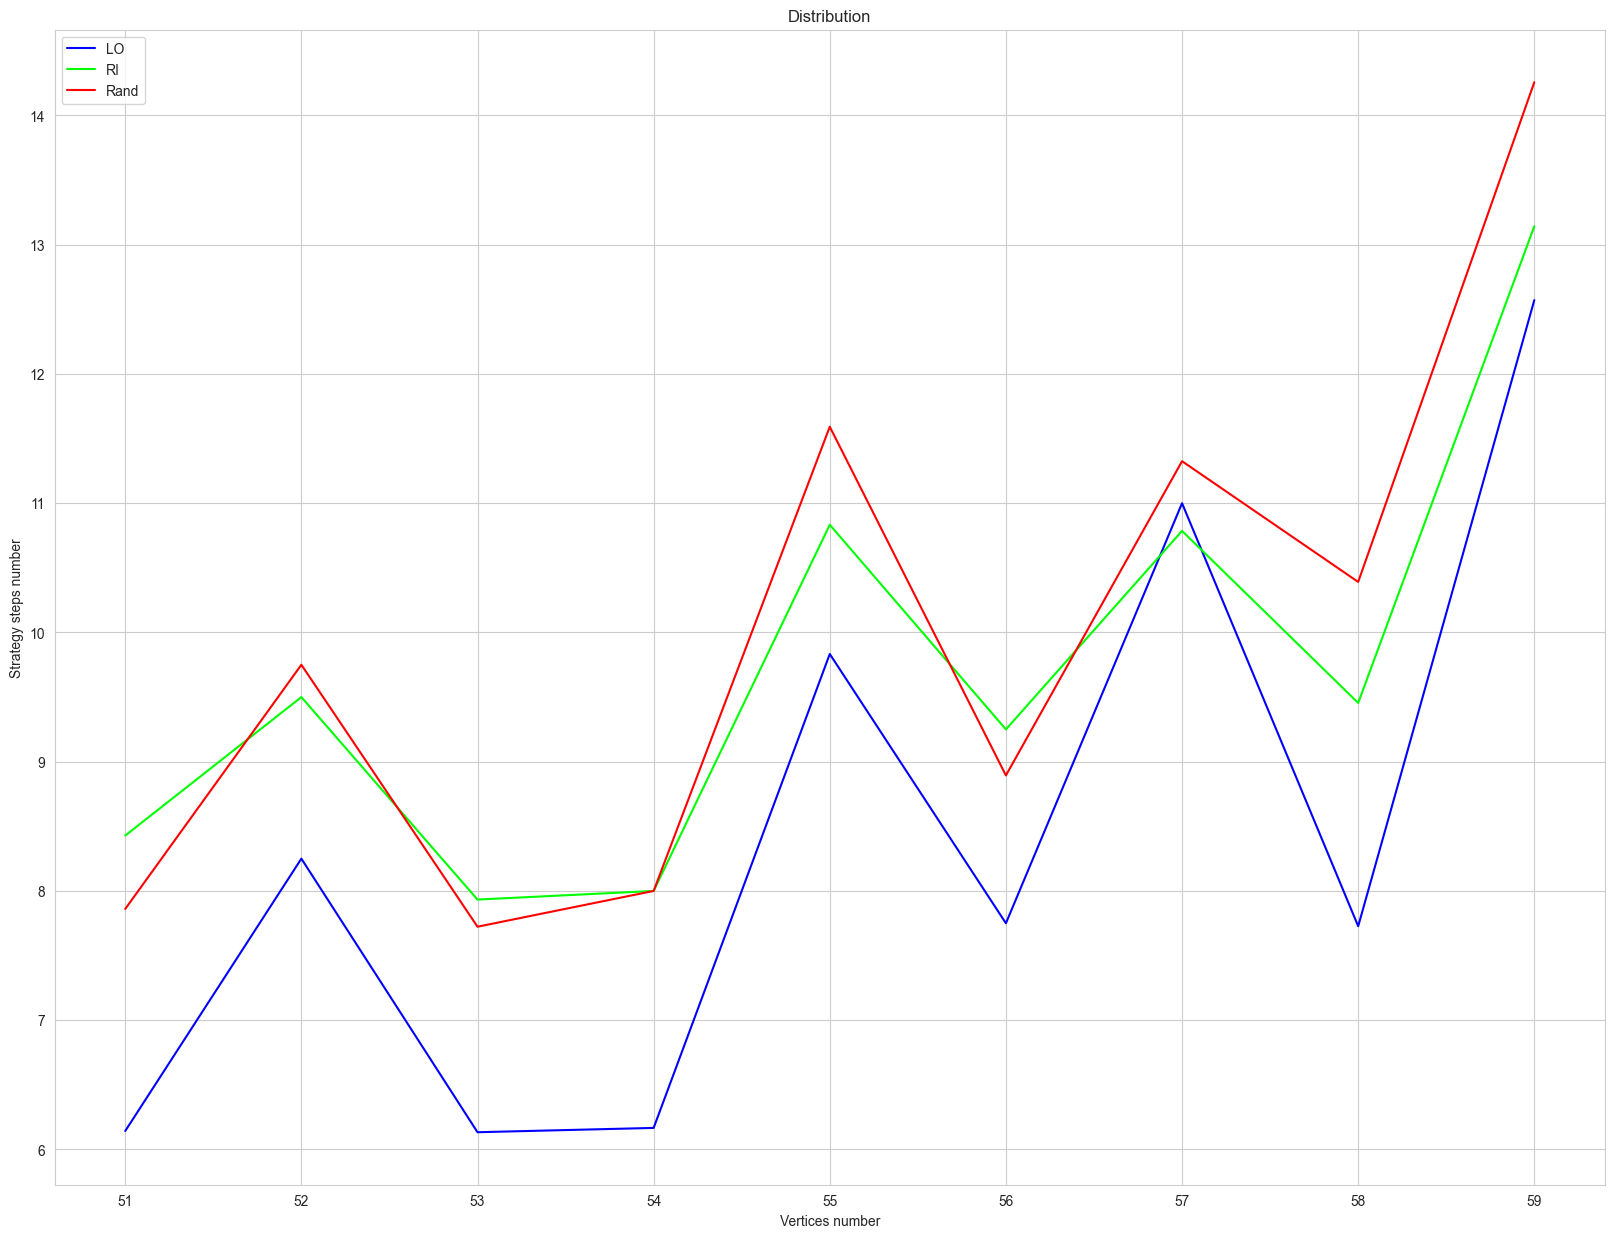

In [15]:
terms_dict = {i: [] for i in range(DOWNLIMIT, UPLIMIT)}

for i, term in enumerate(terms):
    terms_dict[term.verticesNumber].append(
        (term, {"LO": stepsLO[i], "RI": stepsRI[i], "Rand": stepsRand[i]})
    )

average_term_data = dict()
for verticesNumber, data in terms_dict.items():
    data_without_inf = [
        d[1]
        for d in data
        if d[1]["LO"] != float("inf")
        and d[1]["RI"] != float("inf")
        and d[1]["Rand"] != float("inf")
    ]
    avgLO, avgRI, avgRand = 0, 0, 0
    for d in data_without_inf:
        avgLO += d["LO"]
        avgRI += d["RI"]
        avgRand += d["Rand"]

    count = len(data_without_inf)
    if count != 0:
        average_term_data[verticesNumber] = {
            "LO": avgLO / count,
            "RI": avgRI / count,
            "Rand": avgRand / count,
        }

plt.figure(figsize=(20, 15))
ax = plt.gca()
ax.plot(
    list(average_term_data.keys()),
    [data["LO"] for i, data in average_term_data.items()],
    color="blue",
    label="LO",
)
ax.plot(
    list(average_term_data.keys()),
    [data["RI"] for i, data in average_term_data.items()],
    color="lime",
    label="RI",
)
ax.plot(
    list(average_term_data.keys()),
    [data["Rand"] for i, data in average_term_data.items()],
    color="red",
    label="Rand",
)
ax.set(title="Distribution", xlabel="Vertices number", ylabel="Strategy steps number")
ax.legend(prop={"size": 10})

plt.show()

## TESTS

In [16]:
x, y, z = Var(), Var(), Var()
X, Z = Atom(x), Atom(z)
XXX = Application(Application(X, X), X)
XZ = Application(X, Z)
T = Application(Abstraction(x, XXX), Abstraction(x, Application(Abstraction(y, Z), XZ)))

print(T)
for var, item in T._vars.items():
    print("\t{}".format(var), end=": ")
    print(item)

((fun v[4533951] => ((v[4533951] v[4533951]) v[4533951])) (fun v[4533951] => ((fun v[4533952] => v[4533953]) (v[4533951] v[4533953]))))
	v[4533951]: {'free': 0, 'bound': 4}
	v[4533953]: {'free': 2, 'bound': 0}


In [17]:
x, y, z, w, v = Var(), Var(), Var(), Var(), Var()
# (λx.(λy.( ((λz.(y z)) ((λw.w) x)) v )))
lambdaTerm = Abstraction(
    x,
    Abstraction(
        y,
        Application(
            Application(
                Abstraction(z, Application(Atom(y), Atom(z))),
                Application(Abstraction(w, Atom(w)), Atom(w)),
            ),
            Atom(v),
        ),
    ),
)


def testTerm():
    assert len(lambdaTerm.redexes) == 2
    assert lambdaTerm.verticesNumber == 13

    subterm = Application(Atom(y), Atom(z))
    assert lambdaTerm.subterm(1) == lambdaTerm
    assert lambdaTerm.subterm(6) == subterm
    assert lambdaTerm.setSubterm(1, subterm) == subterm

    assert (
        lambdaTerm._updateBoundVariables().verticesNumber == lambdaTerm.verticesNumber
    )
    assert len(lambdaTerm._updateBoundVariables().redexes) == len(lambdaTerm.redexes)

    strategy = LeftmostOutermostStrategy()
    assert len(lambdaTerm._betaConversion(strategy).redexes) == 1
    assert lambdaTerm._betaConversion(strategy).verticesNumber == 10

    assert len(lambdaTerm.normalize(strategy)[0].redexes) == 0
    assert lambdaTerm.normalize(strategy)[1] == 2


def testStrategy():
    strategy = LeftmostOutermostStrategy()
    assert strategy.redexIndex(lambdaTerm) == 4


testTerm()
testStrategy()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.87it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
gamma            0.319641   932.190686 -560.757263     inf      0.074062   
lognorm          0.321826   932.295154 -560.076058     inf      0.080193   
rayleigh         0.339185  1097.227469 -559.427664     inf      0.160072   
exponpow         0.349955   913.388981 -551.696464     inf      0.175393   
norm             0.351327  1169.669990 -555.910373     inf      0.131219   

          ks_pvalue  
gamma      0.616099  
lognorm    0.515141  
rayleigh   0.010494  
exponpow   0.003675  
norm       0.058194  
{'gamma': {'a': 1.2919881688977646, 'loc': 0.8870297329538743, 'scale': 5.722186689315754}}
Norm distribution: (8.28, 6.243524645582814)


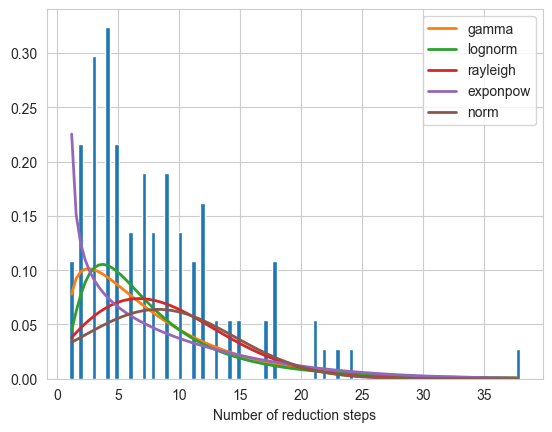

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.09it/s]

Log Norm distribution params: (1.8369609187777587, 0.7776489206506839); expected value = 8.493743559659217


In [18]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 27.30it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
gamma            0.319641   932.190686 -560.757263     inf      0.074062   
lognorm          0.321826   932.295154 -560.076058     inf      0.080193   
rayleigh         0.339185  1097.227469 -559.427664     inf      0.160072   
exponpow         0.349955   913.388981 -551.696464     inf      0.175393   
norm             0.351327  1169.669990 -555.910373     inf      0.131219   

          ks_pvalue  
gamma      0.616099  
lognorm    0.515141  
rayleigh   0.010494  
exponpow   0.003675  
norm       0.058194  
{'gamma': {'a': 1.2919881688977646, 'loc': 0.8870297329538743, 'scale': 5.722186689315754}}
Norm distribution: (8.28, 6.243524645582814)


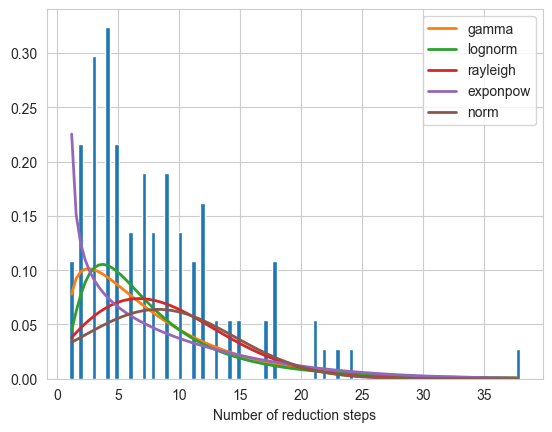

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 23.88it/s]

Log Norm distribution params: (1.8369609187777587, 0.7776489206506839); expected value = 8.493743559659217


In [19]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)